In [1]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn.tree  import DecisionTreeClassifier

In [3]:
# Importing the dataset
data = pd.read_csv('Customer Data.csv')
data.sample(6)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4949,C15088,1101.854700,1.0,0.00,0.00,0.00,38.930597,0.0,0.0,0.000000,0.083333,1,0,2100.0,292.271318,282.262223,0.000000,12
5856,C16020,5172.929286,1.0,3030.33,715.29,2315.04,5573.357964,1.0,0.5,1.000000,0.583333,21,22,7500.0,10141.667170,1734.593075,0.000000,12
4009,C14123,460.644885,1.0,805.42,805.42,0.00,1916.483068,0.5,0.5,0.000000,0.166667,4,6,7000.0,708.479385,190.005996,0.285714,12
2379,C12452,63.064197,1.0,1176.93,0.00,1176.93,0.000000,1.0,0.0,1.000000,0.000000,0,23,7500.0,1319.009967,64.517961,0.363636,12
6335,C16510,364.150125,1.0,0.00,0.00,0.00,1382.984980,0.0,0.0,0.000000,0.166667,2,0,3000.0,2050.337787,188.947534,0.000000,12
3313,C13407,715.044288,1.0,249.96,0.00,249.96,828.943053,1.0,0.0,0.833333,0.166667,2,6,1000.0,189.026970,261.530262,0.000000,6


In [4]:
#Removing Duplicates from the data and creating a backup of the data

Backup_Data = data

print('Shape of the data before droppping duplicates',Backup_Data.shape)

data = data.drop_duplicates()

print('Shape of the data after droppping duplicates',data.shape)

data.sample(6)

Shape of the data before droppping duplicates (8950, 18)
Shape of the data after droppping duplicates (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6503,C16681,504.248851,1.0,472.09,0.0,472.09,0.000000,0.916667,0.000000,0.916667,0.000000,0,11,1000.0,209.360972,282.381583,0.0,12
3395,C13492,1158.783497,1.0,183.00,183.0,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,1200.0,271.548882,355.227627,0.0,12
6659,C16843,63.524092,1.0,145.70,145.7,0.00,493.123696,0.090909,0.090909,0.000000,0.090909,1,2,1500.0,607.546663,76.750324,0.0,11
4390,C14513,937.086541,1.0,79.00,79.0,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1500.0,357.720268,213.991077,0.0,12
847,C10878,62.596086,1.0,475.00,0.0,475.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1500.0,408.132037,170.451899,0.9,12
7771,C17982,4617.891585,1.0,1973.00,108.0,1865.00,1817.470617,0.666667,0.166667,0.583333,0.416667,16,63,4500.0,2755.623951,3796.576690,0.0,12


In [5]:
# Basic Data Exploration shape

data.shape

(8950, 18)

In [6]:
# Basic Data Exploration info

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Basic Data Exploration description

data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Checking number of unique values

data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [9]:
# Checking for null values

data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Treating the null values using fillna

data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS']).mean()
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT']).mean()

In [11]:
# Cheking for null value to see if imputation has been done or not.
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
# Dropping useless columns 

data.drop(columns=['CUST_ID'],axis=1,inplace=True)
data.sample(6)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1329,363.344239,0.818182,665.86,234.98,430.88,0.000000,0.833333,0.750000,0.750000,0.000000,0,34,4494.44945,1734.889908,864.206542,0.090909,12
1799,2377.759245,1.000000,0.00,0.00,0.00,943.907750,0.000000,0.000000,0.000000,0.416667,6,0,4494.44945,4119.519203,864.206542,0.000000,12
872,1382.310939,1.000000,0.00,0.00,0.00,189.624301,0.000000,0.000000,0.000000,0.500000,6,0,4494.44945,381.094555,864.206542,0.000000,12
374,2045.541408,1.000000,1067.28,0.00,1067.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,30,4494.44945,2021.775795,864.206542,0.000000,12
1714,2472.874609,1.000000,2052.74,730.94,1321.80,3251.021027,1.000000,0.416667,1.000000,0.250000,10,30,4494.44945,9076.561132,864.206542,0.083333,12
4111,1839.926709,1.000000,487.75,0.00,487.75,266.614527,0.500000,0.000000,0.416667,0.083333,1,9,4494.44945,791.115227,864.206542,0.000000,12


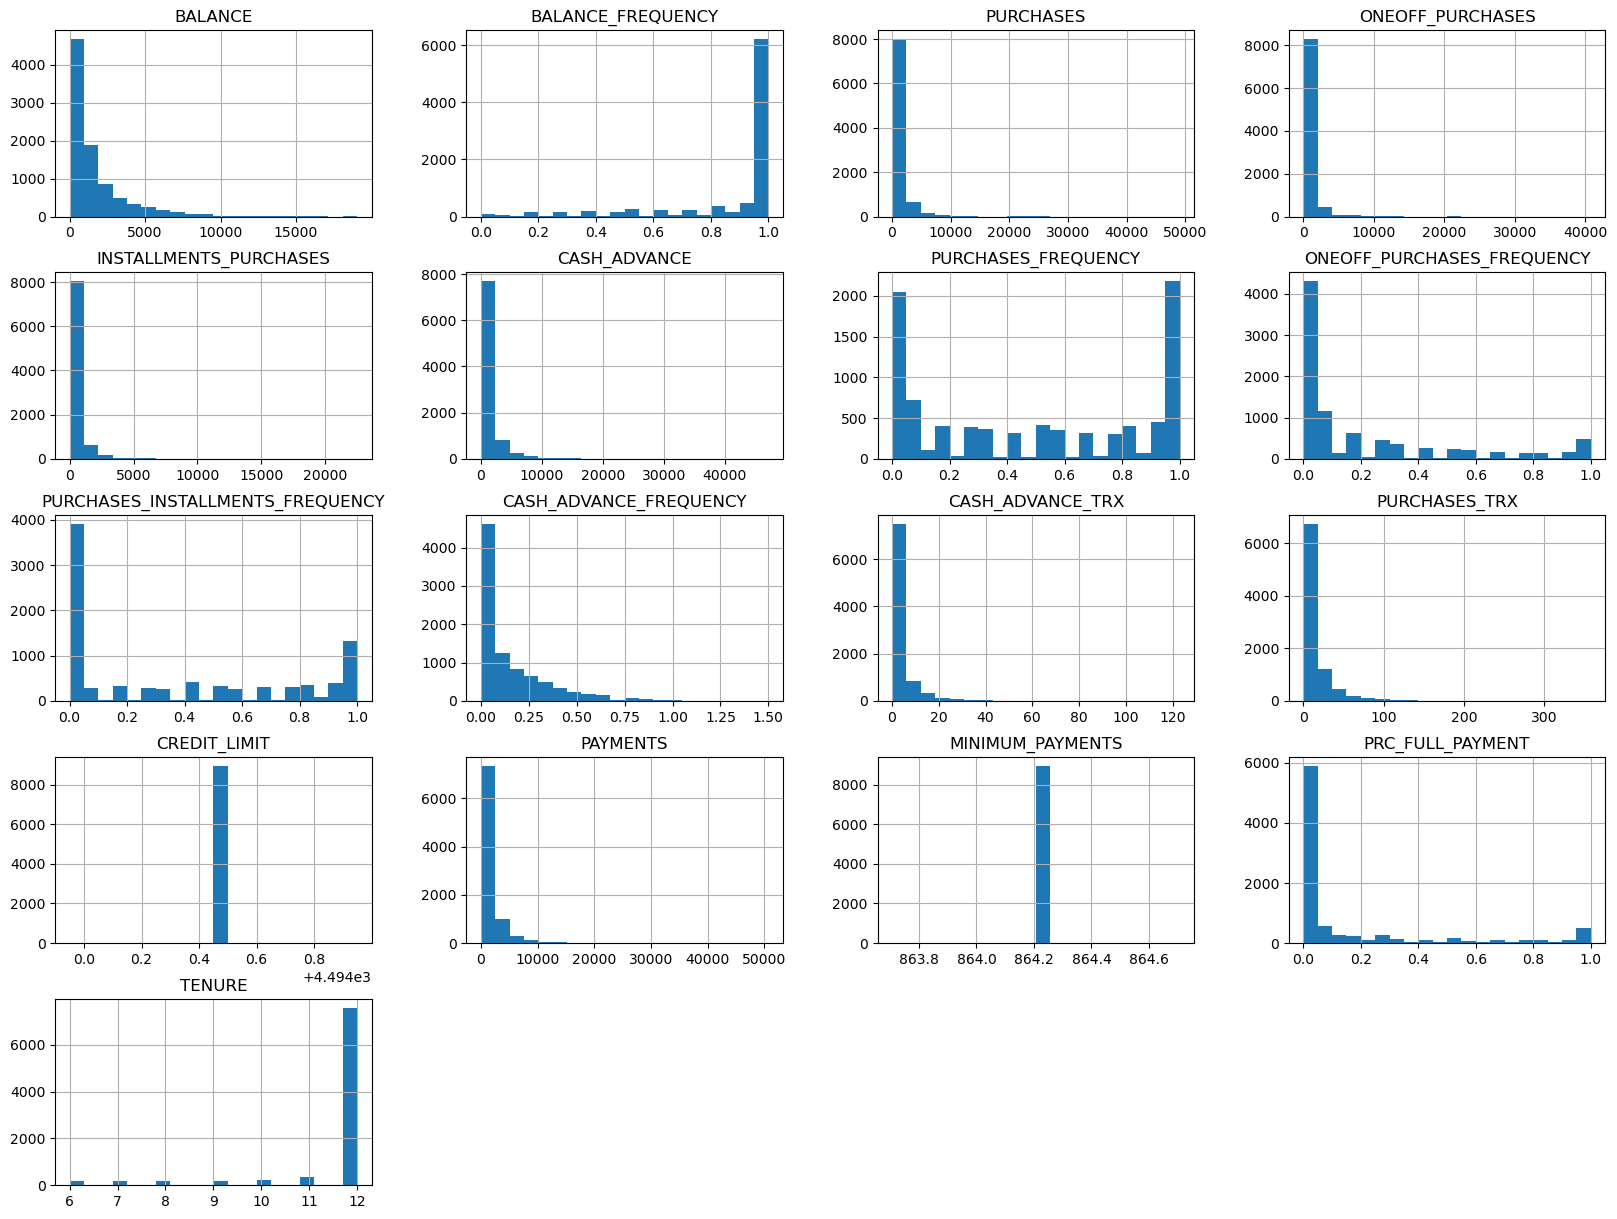

In [13]:
# Distribution of each feature
data.hist(bins=20, figsize=(20,15))
plt.show()

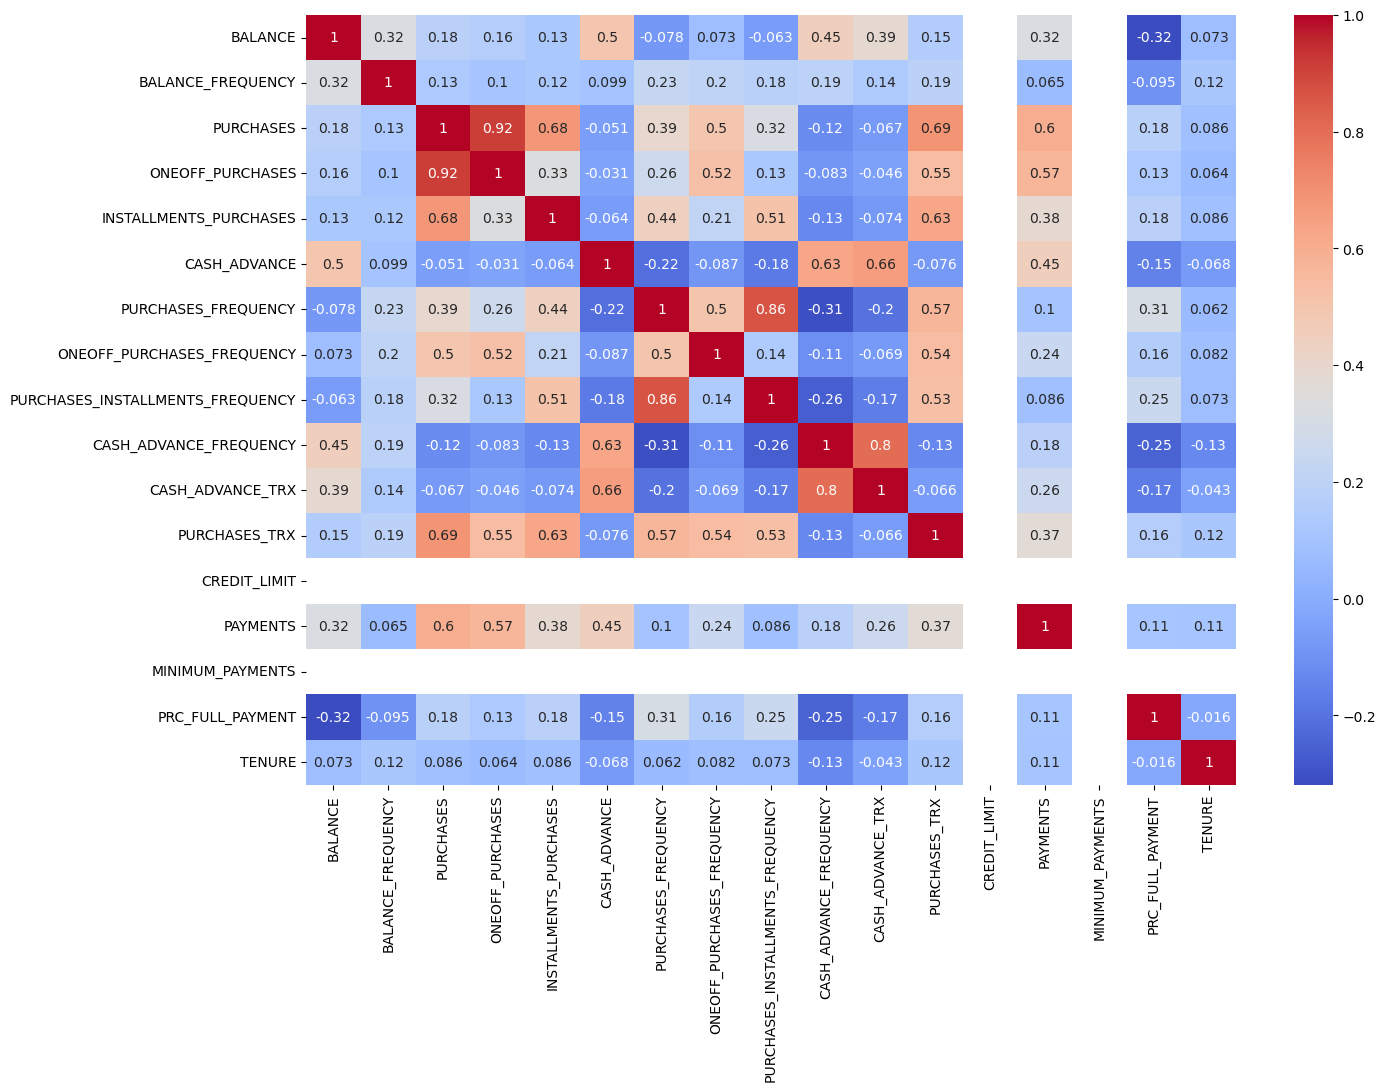

In [14]:
# Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
# Scalling Down the data frame

scaled_data = scaler.fit_transform(data)

In [16]:
# Doing a PCA for better accuracy

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_data.sample(6)

,PCA1,PCA2
744,-2.020309,0.070185
5664,1.052032,-2.062894
7717,-1.320041,-0.572402
43,-1.676065,-0.081026
3563,-1.813615,-1.427978
2465,-1.685931,1.447181


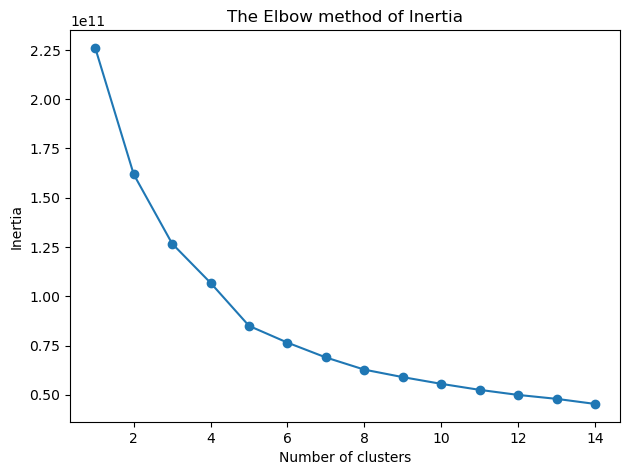

In [17]:
# Visualising how many clusters to make using Elbow method.
inertiaValue = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, 
                init='random',
                n_init=14, 
                max_iter=300,
                tol=1e-04,
                random_state=0)
    
    km.fit(data)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 15), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.title('The Elbow method of Inertia')
plt.savefig('elbow.png', dpi=300)
plt.show()

In [37]:
# Building and fitting the model with data . Here We will use Kmeans Clustering

Kmeans_model = KMeans(4)
Kmeans_model.fit_predict(scaled_data)
pca_df_kmeans = pd.concat([pca_data,pd.DataFrame({'Cluster':Kmeans_model.labels_})],axis = 1)

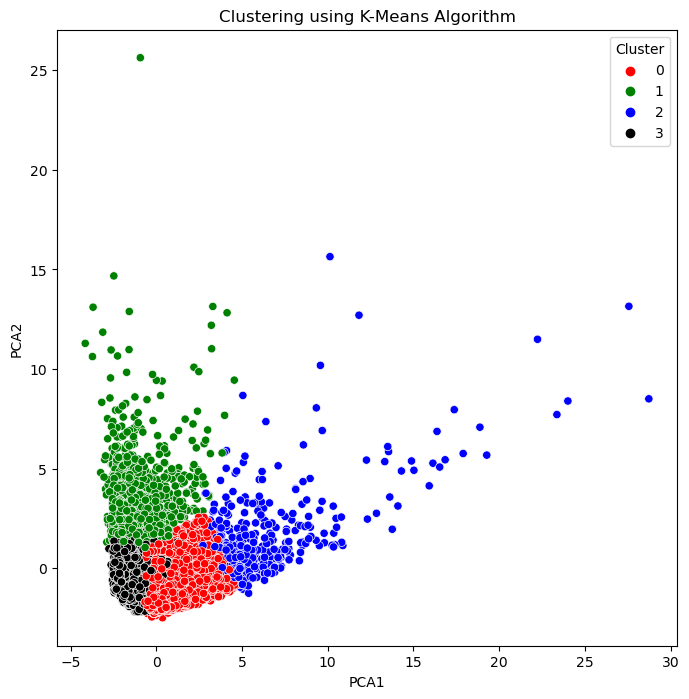

In [39]:
# Visualizing the clustered dataframe
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [26]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=Kmeans_model.cluster_centers_,columns=[data.columns])
# inverse transform the data
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1038.498014,0.785989,281.100246,216.564399,64.804695,559.657882,0.176757,0.087799,0.085453,0.103935,1.878957,3.009623,4494.44945,973.174425,864.206542,0.080716,11.466954
1,3566.386802,0.987771,8143.134904,5414.214137,2730.564603,693.045117,0.951054,0.749535,0.792603,0.073537,2.235616,93.213699,4494.44945,7688.740803,864.206542,0.294207,11.967123
2,4242.975313,0.966936,440.914622,283.863336,157.133014,4437.582558,0.260923,0.129359,0.163320,0.499351,14.499196,6.783762,4494.44945,3350.878835,864.206542,0.037218,11.312701
3,979.076822,0.938767,1281.803172,624.347733,657.727633,229.213830,0.890007,0.303884,0.716919,0.044536,0.826651,22.790684,4494.44945,1383.752360,864.206542,0.266307,11.602594


In [20]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([data,pd.DataFrame({'Cluster':Kmeans_model.labels_})],axis=1)
cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,4494.44945,201.802084,864.206542,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4494.44945,4103.032597,864.206542,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,4494.44945,622.066742,864.206542,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,4494.44945,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4494.44945,678.334763,864.206542,0.000000,12,0


In [21]:
# Cluster Interpretation
cluster_summary = cluster_df.groupby('Cluster').mean()
print(cluster_summary)

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        1038.823359           0.786106   281.422533        216.497179   
1        4242.975313           0.966936   440.914622        283.863336   
2         978.644827           0.938766  1282.313184        624.787096   
3        3566.386802           0.987771  8143.134904       5414.214137   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     65.193998    559.406823             0.177044   
1                    157.133014   4437.582558             0.260923   
2                    657.798522    229.214081             0.890303   
3                   2730.564603    693.045117             0.951054   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

<Axes: xlabel='Cluster', ylabel='count'>

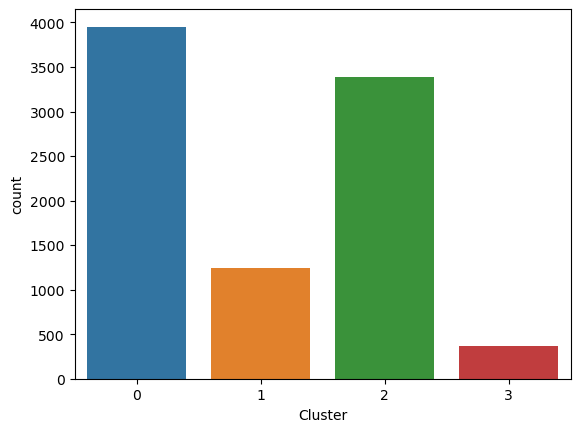

In [23]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

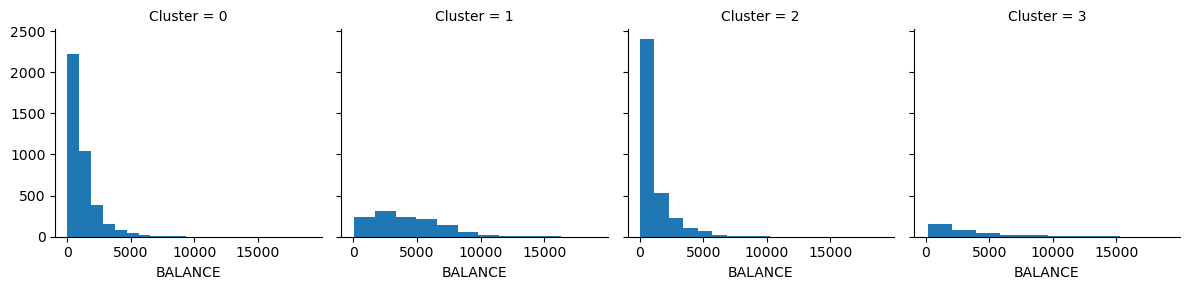

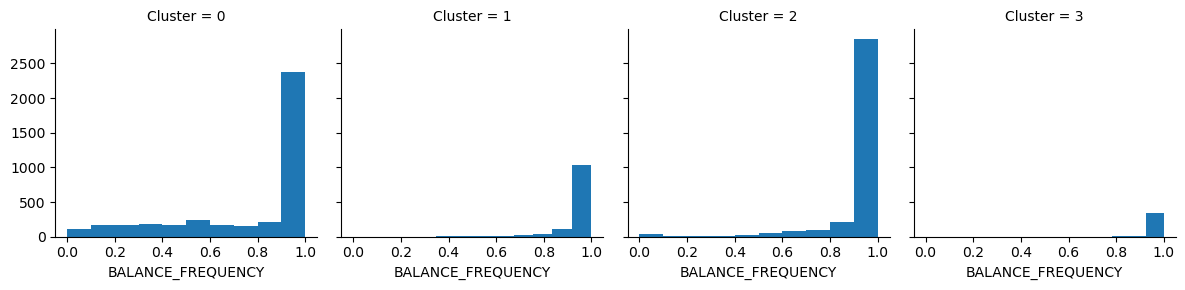

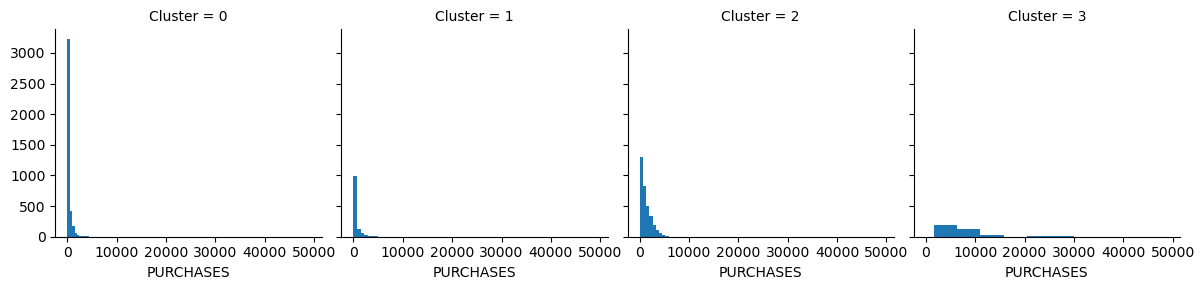

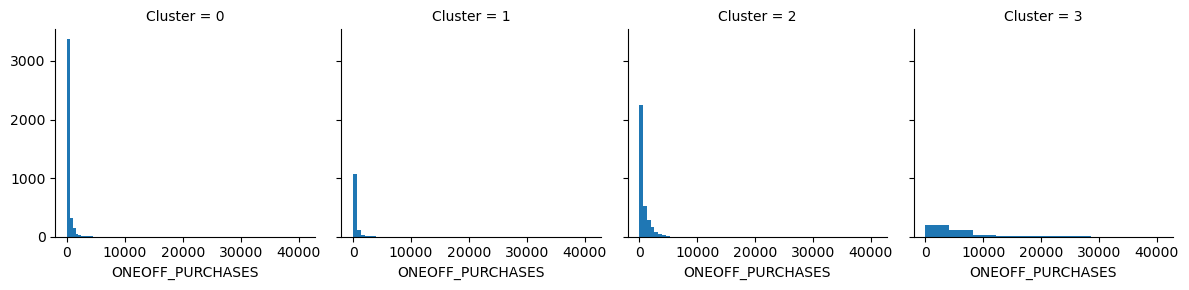

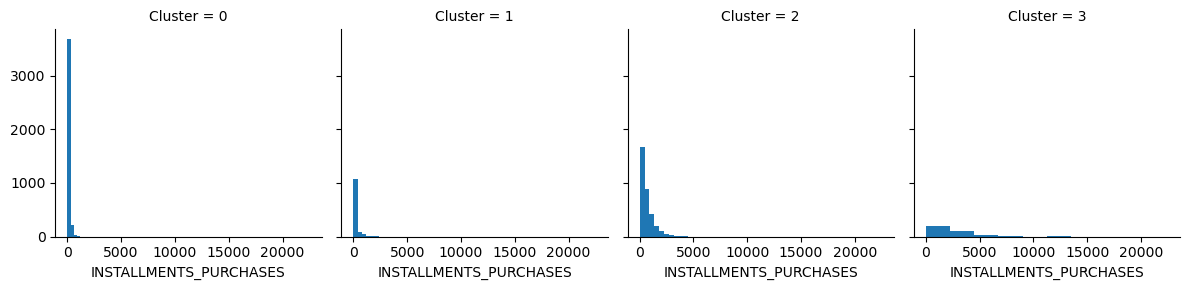

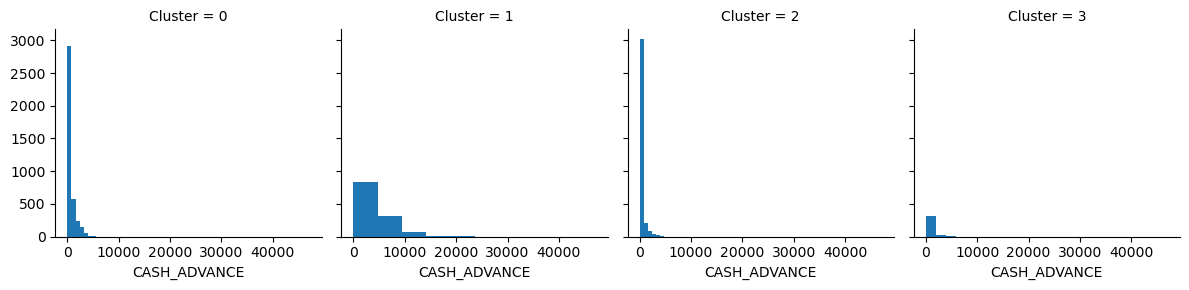

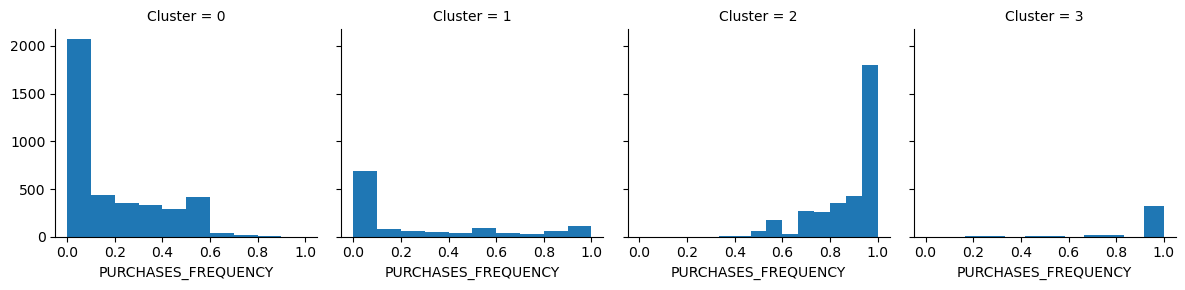

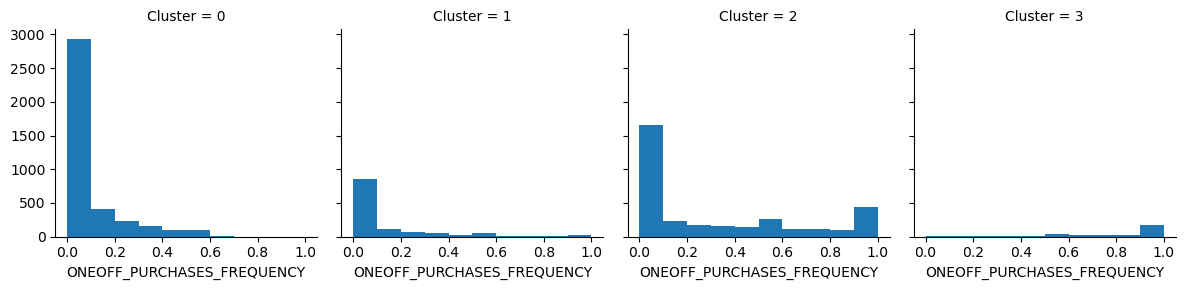

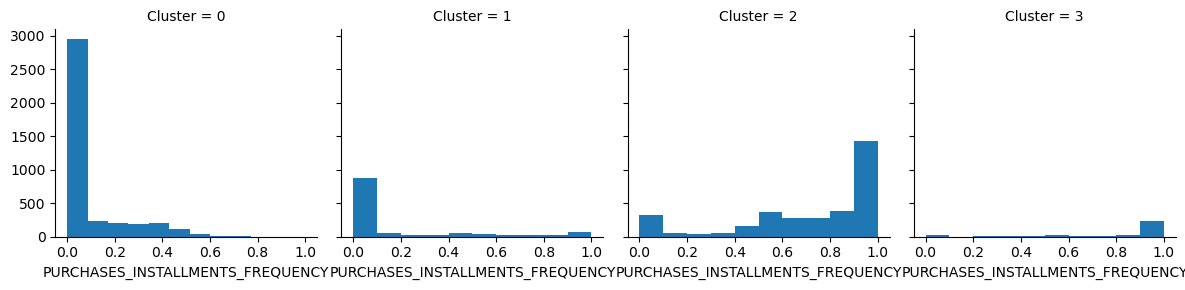

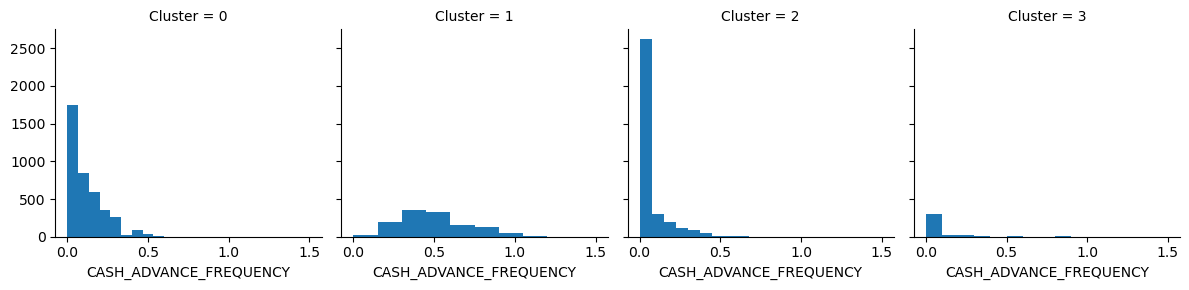

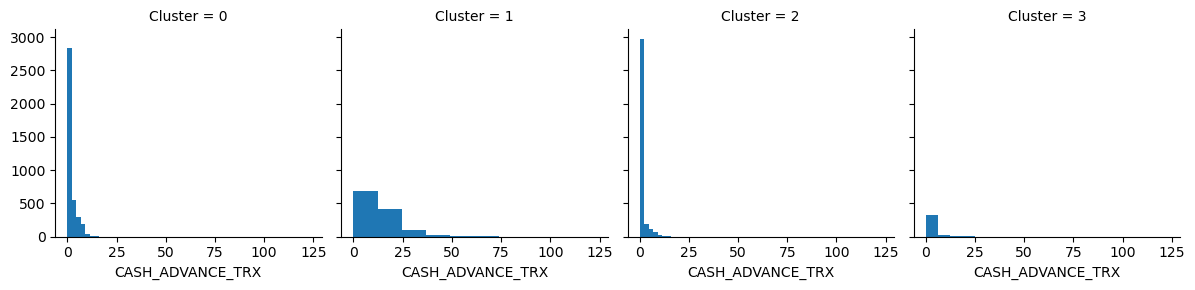

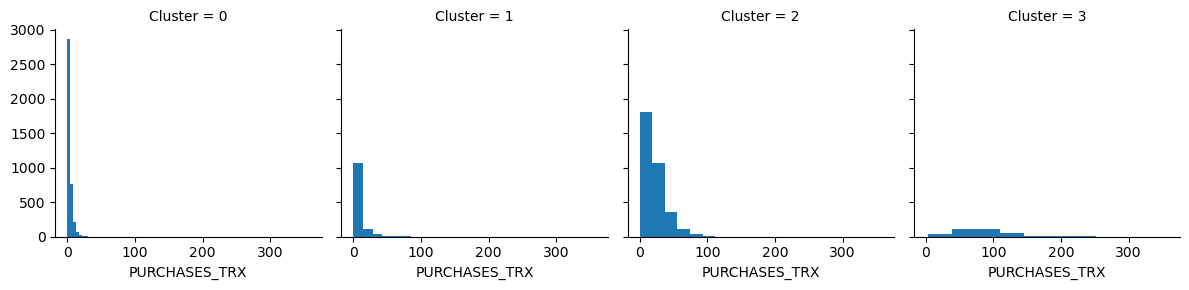

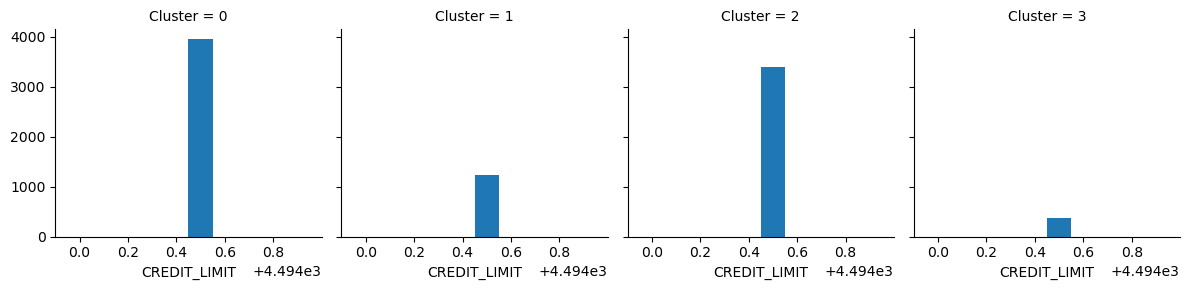

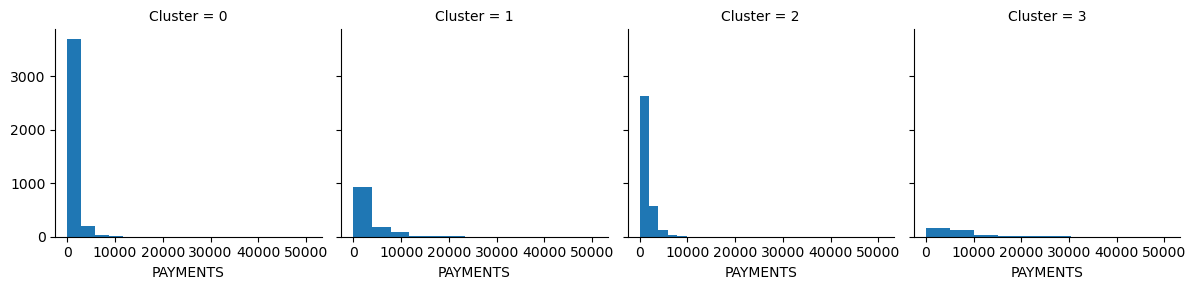

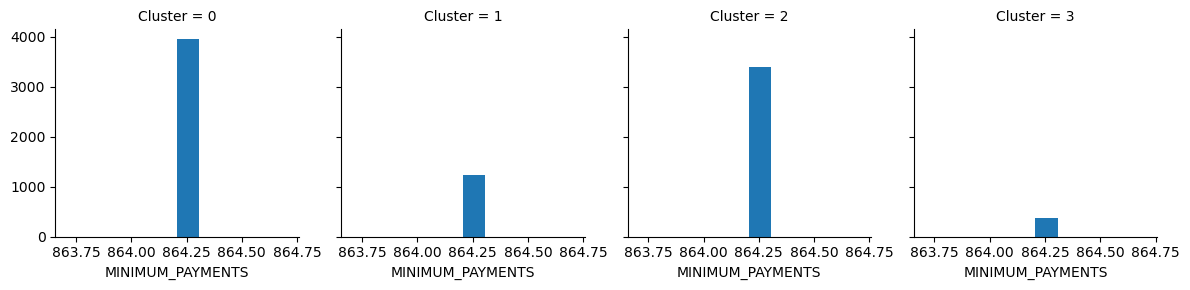

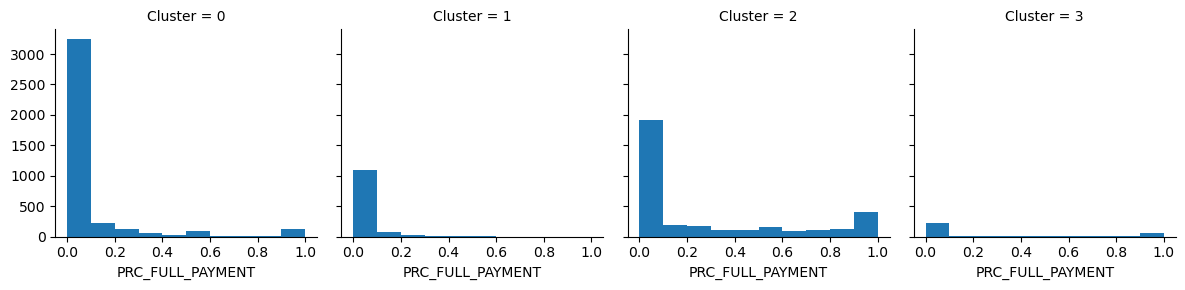

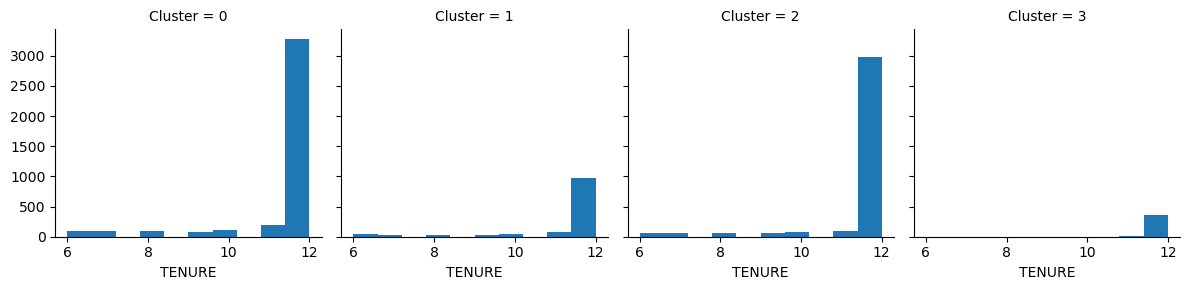

In [34]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [28]:
#Saving Scikitlearn models
import joblib
joblib.dump(Kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [29]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

In [30]:
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [31]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1155   27   25    0]
 [  20  331   16    2]
 [  28    8  972   11]
 [   0    3   11   76]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1207
           1       0.90      0.90      0.90       369
           2       0.95      0.95      0.95      1019
           3       0.85      0.84      0.85        90

    accuracy                           0.94      2685
   macro avg       0.92      0.91      0.91      2685
weighted avg       0.94      0.94      0.94      2685



In [33]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result*100,'% Acuuracy')

94.37616387337057 % Acuuracy
